Home Task 1. Hypothesis Testing for Proportions

A company believes that percentage of resident in Ternopil own vehicle is 60% or less.
Sales manager disagree. He conducted a test surveying 250 residents and 170 responded yes to owning a vehicle.

State the null hypothesis and alternative hypothesis.
At 10% significance level, is there enough evidence to reject the null hypothesis?

NULL HYPOTHESIS: p <= 0.6

ALTERNATIVE HYPOTHESIS: p > 0.6

SAMPLE SIZE: 250 (normal distribution)

CONFIDENCE LEVEL: 90% (opposite to significance)

SAMPLE PROPORTION: 170/250 = 0.68

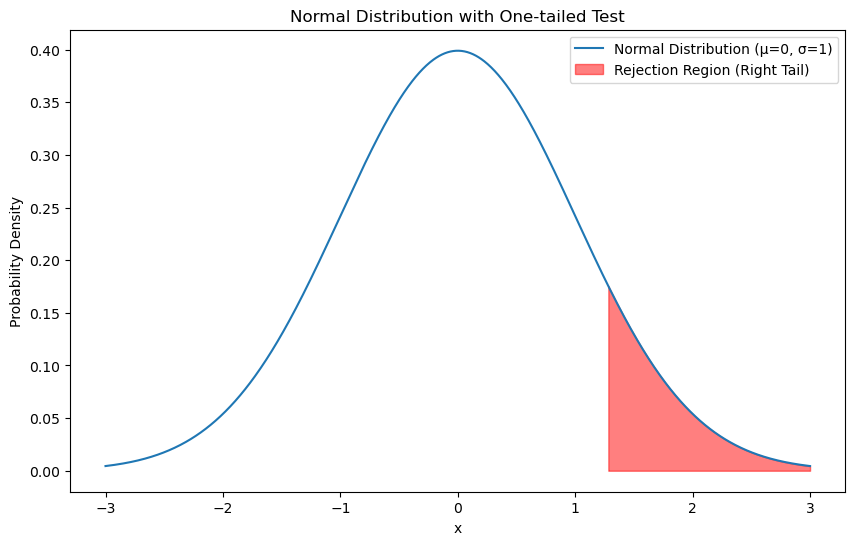

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def plot_normal_distribution_with_one_tailed_test(mean, std_dev, alpha, test_type='right'):
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
    y = stats.norm.pdf(x, mean, std_dev)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label=f'Normal Distribution (μ={mean}, σ={std_dev})')

    if test_type == 'right':
        critical_value = stats.norm.ppf(1 - alpha, mean, std_dev)
        plt.fill_between(x, y, where=(x > critical_value), color='red', alpha=0.5, label='Rejection Region (Right Tail)')

    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.title('Normal Distribution with One-tailed Test')
    plt.legend()

    plt.show()

plot_normal_distribution_with_one_tailed_test(mean=0, std_dev=1, alpha=0.1, test_type='right')

This is a one-tailed test, because the null hypothesis states 60% OR LESS. The only way it can get rejected is if the number is more than 60%, that's why it's a right one-tailed test.

Let's find critical z-score:

In [6]:
alpha_right = 0.10

z_score_right_tailed = stats.norm.ppf(1 - alpha_right)
z_score_right_tailed

1.2815515655446004

So, our z-critical is 1.28. Let's calculate the actual z.

In [8]:
z_c= (0.68-0.6)/np.sqrt((0.6 *0.4)/250)
z_c

2.5819888974716134

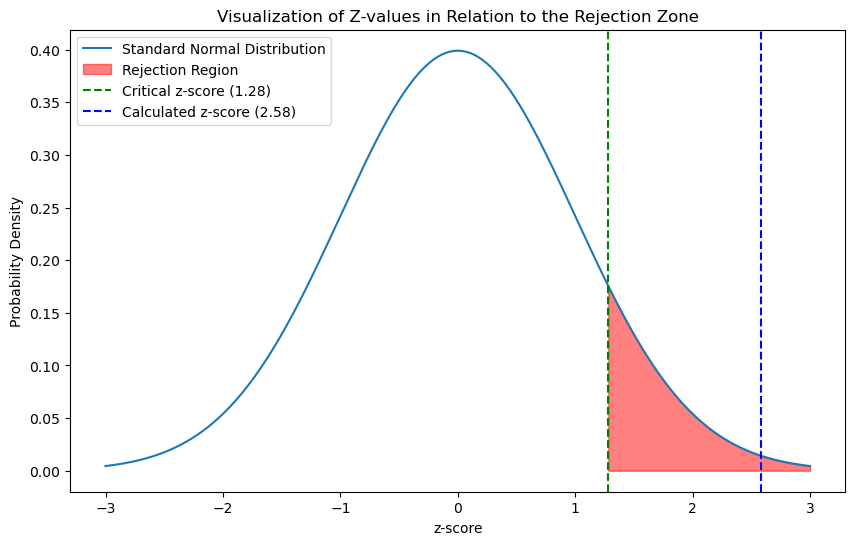

In [9]:
def plot_z_values_and_rejection_zone(critical_z, calculated_z, mean=0, std_dev=1):
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

    y = stats.norm.pdf(x, mean, std_dev)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Standard Normal Distribution')

    plt.fill_between(x, y, where=(x > critical_z), color='red', alpha=0.5, label='Rejection Region')

    plt.axvline(x=critical_z, color='green', linestyle='--', label=f'Critical z-score ({critical_z:.2f})')

    plt.axvline(x=calculated_z, color='blue', linestyle='--', label=f'Calculated z-score ({calculated_z:.2f})')

    plt.xlabel('z-score')
    plt.ylabel('Probability Density')
    plt.title('Visualization of Z-values in Relation to the Rejection Zone')
    plt.legend()

    plt.show()

plot_z_values_and_rejection_zone(critical_z=1.282, calculated_z=2.58)

Our calculated z-score falls into rejection zone, meaning the NULL HYPOTHESIS IS REJECTED. Therefore, we accept the alternative hypothesis. 

Home Task 2. Hypothesis Testing Difference of Two Means

A business owner is in the process of deciding whether or not to invest in a new factory that refines oil in order to meet the high demand that commodity. A test showed that the old factory refines oil at a mean rate of 3.1L per second at a standard deviation of 1.0 using a samp of 40.

The new factory was measured to refine oil at a mean rate of 3.8L per second at a standard deviation of 1.5 using a sample of 36.

Determine if there is any major difference at 10% significance level.

NULL HYPOTHESIS: n1 = n2

ALTERNATIVE HYPOTHESIS: n1 != n2

CONFIDENCE LEVEL: 90% (opposite to significance)

SAMPLE SIZES: 40 and 36 (normal distribution)

This is a two-tailed test at 90% confidence level, so there is the following distibution.

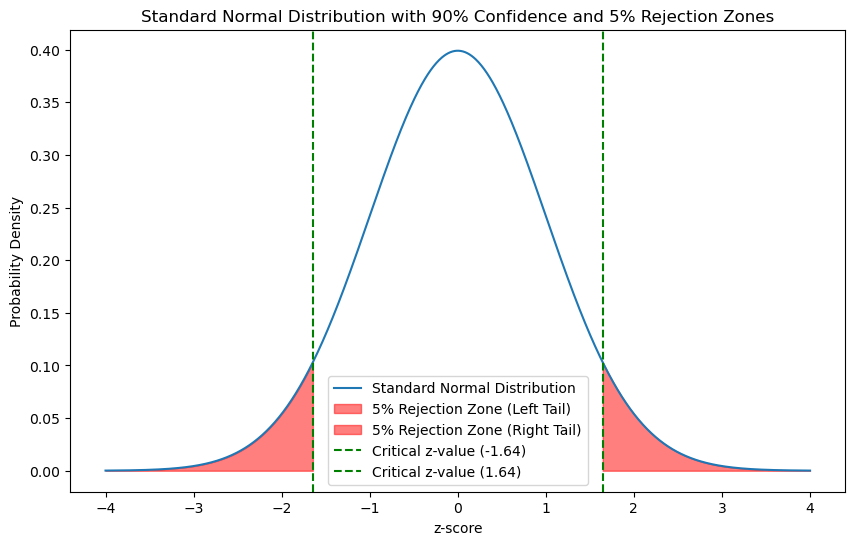

In [3]:
def plot_confidence_and_rejection_zones():
    mean = 0
    std_dev = 1

    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

    y = stats.norm.pdf(x, mean, std_dev)

    z_lower = stats.norm.ppf(0.05)
    z_upper = stats.norm.ppf(0.95)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Standard Normal Distribution')

    plt.fill_between(x, y, where=(x < z_lower), color='red', alpha=0.5, label='5% Rejection Zone (Left Tail)')
    plt.fill_between(x, y, where=(x > z_upper), color='red', alpha=0.5, label='5% Rejection Zone (Right Tail)')

    plt.axvline(x=z_lower, color='green', linestyle='--', label=f'Critical z-value ({z_lower:.2f})')
    plt.axvline(x=z_upper, color='green', linestyle='--', label=f'Critical z-value ({z_upper:.2f})')

    plt.xlabel('z-score')
    plt.ylabel('Probability Density')
    plt.title('Standard Normal Distribution with 90% Confidence and 5% Rejection Zones')
    plt.legend()

    plt.show()

plot_confidence_and_rejection_zones()

Our z-critical will be -1.64 and 1.64 respectively. Let's find z-calculated:

In [4]:
mean_old_factory = 3.1
std_dev_old_factory = 1.0
n_old_factory = 40

mean_new_factory = 3.8
std_dev_new_factory = 1.5
n_new_factory = 36

numerator = mean_new_factory - mean_old_factory
denominator = np.sqrt((std_dev_old_factory**2 / n_old_factory) + (std_dev_new_factory**2 / n_new_factory))
z_calculated = numerator / denominator
z_calculated

2.3664319132398455

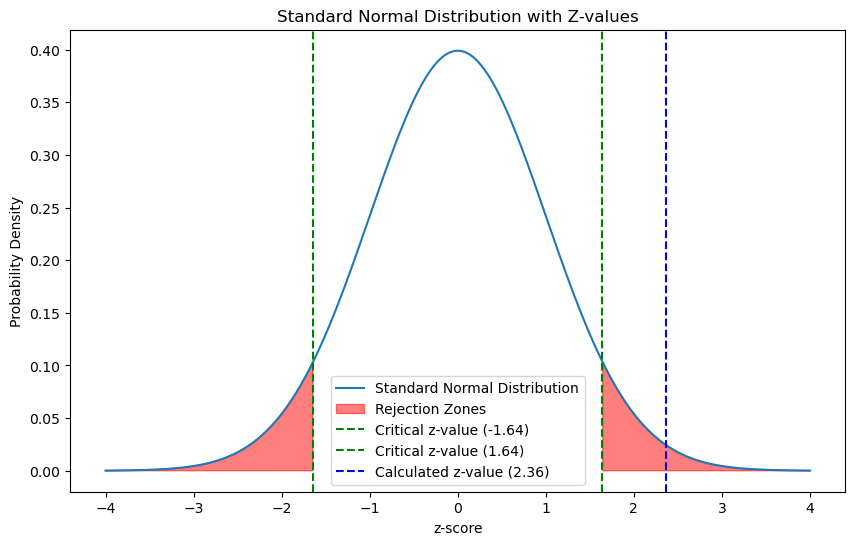

In [5]:
def plot_distribution_with_z_values(z_critical, z_calculated):
    mean = 0
    std_dev = 1
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

    y = stats.norm.pdf(x, mean, std_dev)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Standard Normal Distribution')

    plt.fill_between(x, y, where=(x < -z_critical) | (x > z_critical), color='red', alpha=0.5, label='Rejection Zones')

    plt.axvline(x=-z_critical, color='green', linestyle='--', label=f'Critical z-value (-{z_critical:.2f})')
    plt.axvline(x=z_critical, color='green', linestyle='--', label=f'Critical z-value ({z_critical:.2f})')

    plt.axvline(x=z_calculated, color='blue', linestyle='--', label=f'Calculated z-value ({z_calculated:.2f})')

    plt.xlabel('z-score')
    plt.ylabel('Probability Density')
    plt.title('Standard Normal Distribution with Z-values')
    plt.legend()

    plt.show()


plot_distribution_with_z_values(z_critical=1.64, z_calculated=2.36)

Our z-calculated falls into the rejection zone, so NULL HYPOTHESIS IS REJECTED. Therefore, we accept the alternative hypothesis.